In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print('shape->',df.shape)
print(df.info())

shape-> (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

In [4]:
df = df.drop(['Unnamed: 32'],axis=1)

In [5]:
df.shape

(569, 32)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
scler = StandardScaler()
X = df.drop('diagnosis',axis=1)
X_sclaed = scler.fit_transform(X)

## PCA

In [11]:
pca = PCA()
pca.fit_transform(X_sclaed)

array([[ 9.18319983e+00,  1.97127137e+00, -1.17162471e+00, ...,
        -3.39113949e-02,  4.55717832e-02, -4.71657487e-02],
       [ 2.38329766e+00, -3.75345877e+00, -5.80228664e-01, ...,
         3.26298575e-02, -5.90208043e-03, -1.84483129e-03],
       [ 5.74247239e+00, -1.08035048e+00, -5.33087882e-01, ...,
         4.70218699e-02,  3.28969989e-03,  7.35346039e-04],
       ...,
       [ 1.25189010e+00, -1.89397674e+00,  5.34466848e-01, ...,
        -2.56758630e-03,  6.34033194e-03,  3.80807814e-03],
       [ 1.03650353e+01,  1.69639755e+00, -1.90741785e+00, ...,
        -6.80834660e-02, -8.43022898e-02, -2.37630430e-02],
       [-5.47826365e+00, -6.72788035e-01,  1.47716504e+00, ...,
        -9.51329032e-03, -6.10512178e-02, -1.94561856e-02]])

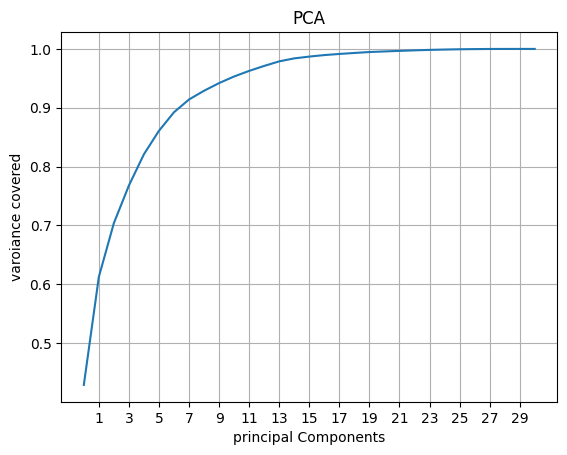

In [13]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('principal Components')
plt.ylabel('varoiance covered')
plt.title('PCA')
plt.show()

In [14]:
pca = PCA(n_components = 13)
new_pcomp = pca.fit_transform(X_sclaed)
princi_comp = pd.DataFrame(new_pcomp)
princi_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372280,0.371844,2.180529,-0.231610,-0.090398,-0.875264,0.264544,-0.859592
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044935,0.426916,-0.659940,1.085346,0.810101,0.158546
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463188,-0.715209,-0.010711,-0.082301,0.426604,-0.603972,0.122948
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561668,1.950177,1.287990,1.272642,-1.171369,-1.219481,-1.138506,1.003884
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233300,-0.205435,-0.959329,0.629119,-0.166354,0.379518,0.649892,-0.109990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.435329,-3.565358,2.399112,1.197814,-0.071089,2.028789,-1.345195,-0.522454,-0.184011,1.045682,0.365107,-0.072605,0.129717
565,3.789458,-3.573419,2.029505,-2.478688,-0.498521,-0.080422,-1.024112,-0.585571,-0.949736,-0.258745,-0.134607,0.246301,0.222094
566,1.251890,-1.893977,0.534467,-2.077633,1.814829,0.394713,-0.437806,-0.178668,0.262114,0.475975,0.580852,-0.847781,0.101495
567,10.365035,1.696398,-1.907418,-2.351807,-0.028220,-0.656720,-0.195264,0.275202,-0.072775,-0.518178,-0.117402,-0.178057,-0.696730


In [15]:
df['diagnosis'] = df['diagnosis'].replace({'M':0,'B':1})
y = df['diagnosis']


In [17]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [18]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("=======Train Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_train,y_pred) *100:.2f}%')
    elif train==False:
        pred = clf.predict(x_test)
        print("=======Test Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_test,pred) *100:.2f}%')
        print('\n \n Classification Report=>\n',classification_report(y_test,pred,digits=2))
        

In [20]:
from sklearn.svm import SVC 
svc =SVC()
svc.fit(x_train,y_train)
metric_score(svc,x_train,x_test,y_train,y_test,train = True)
metric_score(svc,x_train,x_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 98.12%
=======Test Result===========
Accuracy Score=> 97.90%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.97      1.00      0.98        93

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



## LETS CHANGE THE HYPER TUNING FOR OVER-FITTING

In [26]:
param_grid = {'C':[1,5,10,20],'gamma':[0.001,0.01,0.02,0.002]}

In [27]:
gridsearch = GridSearchCV(estimator=svc,param_grid=param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 20, 'gamma': 0.002}

In [28]:
svc =SVC(C= 20, gamma=0.002)
svc.fit(x_train,y_train)
metric_score(svc,x_train,x_test,y_train,y_test,train = True)
metric_score(svc,x_train,x_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 98.36%
=======Test Result===========
Accuracy Score=> 97.90%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.97      1.00      0.98        93

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# CFREATING PIPELINE

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
X = df.drop(['Unnamed: 32','diagnosis'],axis=1)
y = df.diagnosis
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [33]:
pipe = Pipeline([('Scalar',StandardScaler()),
                ('PCA',PCA(n_components=13)),
                ('SVM',SVC(C= 20, gamma=0.002))])

In [34]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Scalar', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=20, gamma=0.002))])

In [35]:
y_pred = pipe.predict(x_test)


In [36]:
accuracy_score(y_test,y_pred)

0.972027972027972